In [64]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import poisson
from scipy.stats import binom
from scipy.stats import norm

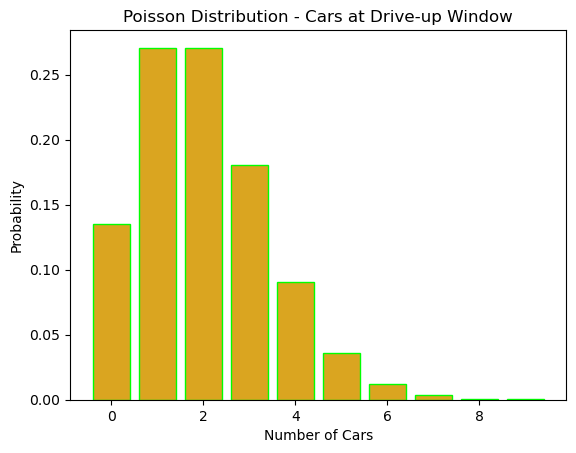

Probability that no cars drive up: 0.1353
Probability that 3 or more cars come through: 0.3233
Probability that the drive-through gets at least 1 car: 0.8647


In [16]:
# A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a 
# Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions 
# concerning the probability of cars waiting at the drive-up window.

# What is the probability that no cars drive up in the noon hour?
# What is the probability that 3 or more cars come through the drive through?
# How likely is it that the drive through gets at least 1 car?

# Define the mean for the Poisson distribution
mean_cars = 2

# Create an array of possible numbers of cars (assuming a reasonable range)
num_cars = np.arange(0,10)

# Calculate the Poisson probability mass function (pmf) for each number of cars
pmf_values = poisson.pmf(num_cars, mu=mean_cars)

# Create a bar chart
plt.bar(num_cars, pmf_values, color='goldenrod', edgecolor='lime')

# Add labels and title
plt.title('Poisson Distribution - Cars at Drive-up Window')
plt.xlabel('Number of Cars')
plt.ylabel('Probability')

# Display the chart
plt.show()

# Calculate probabilities for specific scenarios
prob_no_cars = poisson.pmf(0, mu=mean_cars)
prob_3_or_more_cars = 1 - poisson.cdf(2, mu=mean_cars)  # 1 minus cumulative probability for 2 or fewer cars
prob_at_least_1_car = 1 - poisson.pmf(0, mu=mean_cars)

# Display the calculated probabilities
print(f"Probability that no cars drive up: {prob_no_cars:.4f}")
print(f"Probability that 3 or more cars come through: {prob_3_or_more_cars:.4f}")
print(f"Probability that the drive-through gets at least 1 car: {prob_at_least_1_car:.4f}")


In [10]:
# Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

# What grade point average is required to be in the top 5% of the graduating class?
# What GPA constitutes the bottom 15% of the class?
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this 
# scholarship?
# If I have a GPA of 3.5, what percentile am I in?

# Given parameters
mean_gpa = 3.0
std_dev_gpa = 0.3

# Function to calculate percentile from z-score
def percentile_from_z_score(z_score):
    return stats.norm.cdf(z_score)

# Function to calculate z-score from percentile
def z_score_from_percentile(percentile):
    return stats.norm.ppf(percentile)

# Calculate GPA required to be in the top 5%
top_5_percentile_gpa = z_score_from_percentile(0.95) * std_dev_gpa + mean_gpa

# Calculate GPA for the bottom 15%
bottom_15_percentile_gpa = z_score_from_percentile(0.15) * std_dev_gpa + mean_gpa

# Calculate the range for the third decile
third_decile_bottom = z_score_from_percentile(0.2) * std_dev_gpa + mean_gpa
third_decile_top = z_score_from_percentile(0.3) * std_dev_gpa + mean_gpa

# Determine the percentile for GPA of 3.5
percentile_3_5 = percentile_from_z_score((3.5 - mean_gpa) / std_dev_gpa)

# Display the results
print(f"a. GPA required to be in the top 5%: {top_5_percentile_gpa:.2f}")
print(f"b. GPA constituting the bottom 15%: {bottom_15_percentile_gpa:.2f}")
print(f"c. Range of the third decile: {third_decile_bottom:.2f} to {third_decile_top:.2f}")
print(f"d. Percentile for GPA of 3.5: {percentile_3_5:.2%}")


a. GPA required to be in the top 5%: 3.49
b. GPA constituting the bottom 15%: 2.69
c. Range of the third decile: 2.75 to 2.84
d. Percentile for GPA of 3.5: 95.22%


In [32]:
#make distribution
#it specifies normal distribution and we know mean of 3.0 and dev of 0.3
μ = 3.0
σ = 0.3
grades_dist = stats.norm(μ,σ)
# what gpa to be in top 5%? count from the right side and use inverse survival
grades_dist.isf(0.05)
# or the right side
# grades_dist.ppf(0.95) count from the left and do ppf

3.4934560880854417

In [34]:
# bottom 15%
round(grades_dist.ppf(0.15),2)

2.69

In [35]:
grades_dist.ppf(0.2)

2.7475136299281258

In [36]:
grades_dist.ppf(0.3)

2.842679846187588

In [38]:
lower_fence, upper_fence = grades_dist.ppf([0.2,0.3])
lower_fence, upper_fence

(2.7475136299281258, 2.842679846187588)

In [39]:
candidate_grade = 2.8
lower_fence < candidate_grade < upper_fence

True

In [40]:
grades_dist.cdf(3.5) #from the left side

0.9522096477271853

In [42]:
# or
round(grades_dist.sf(3.5),2) #from the right side

0.05

In [6]:
# A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 
# click-throughs. How likely is it that this many people or more click through?
# Given parameters
total_visitors = 4326
observed_clicks = 97
click_through_rate = 0.02  # 2%

# Calculate the probability of 97 or more click-throughs
prob_97_or_more_clicks = 1 - binom.cdf(observed_clicks - 1, total_visitors, click_through_rate)

# Display the result
print(f"The probability of observing 97 or more click-throughs is approximately: {prob_97_or_more_clicks:.4f}")


The probability of observing 97 or more click-throughs is approximately: 0.1398


In [43]:
# what type of dist? binomial cause there is a do or not do option
# click-thru rate:
#rate of success: 0.02 (p)
# trails: 4326 (n)
# 97 or more clickthrus: survival function!

clicks_dist = stats.binom(4326, 0.02)
round(clicks_dist.sf(96),2) #non inclusive, goes to the next number, 

0.14

In [45]:
# in case you want to use Poisson dis, we can use:
# lambda: probability of success over that specific window
# lambda = 0.02 * 4326

In [7]:
# You are working on some statistics homework consisting of 100 questions where all of the answers are a 
# probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the 
# answer to each question.

# What is the probability that at least one of your first 60 answers is correct?
# Given parameters
total_questions = 100
answered_questions = 60
probability_of_wrong_answer = 0.99  # Assuming random guessing, so the probability of getting a question wrong is 1 - probability_of_correct_answer

# Calculate the probability of getting at least one correct answer in the first 60 questions
probability_at_least_one_correct = 1 - probability_of_wrong_answer ** answered_questions

# Display the result
print(f"The probability of getting at least one correct answer in the first 60 questions is approximately: {probability_at_least_one_correct:.4f}")


The probability of getting at least one correct answer in the first 60 questions is approximately: 0.4528


In [48]:
# 100 questions on homework
# answers are all probabilities to the 100th place
# question: prob that we get at least one out of the first 60 correct
prob_success = 1 / 101
num_trials = 60 
homework_dist = stats.binom(num_trials, prob_success)
# survival for any amount over 0
homework_dist.sf(0)

0.44955038406224

In [8]:
# The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% 
# chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 
# 3 active cohorts of 22 students visit the break area. 
# How likely is it that the break area gets cleaned up each day? 
# How likely is it that it goes two days without getting cleaned up? All week?

# Given parameters
probability_of_cleaning_up = 0.03  # 3%
students_per_cohort = 22
active_cohorts = 3
visiting_probability = 0.9  # 90%
days_in_week = 5

# Calculate the probability of getting cleaned up each day
prob_cleaned_up_each_day = 1 - binom.pmf(0, active_cohorts * students_per_cohort * visiting_probability, probability_of_cleaning_up)

# Calculate the probability of going two days without getting cleaned up
prob_two_days_without_cleaning = binom.pmf(0, 2 * active_cohorts * students_per_cohort * visiting_probability, probability_of_cleaning_up)

# Calculate the probability of going all week without getting cleaned up
prob_all_week_without_cleaning = binom.pmf(0, days_in_week * active_cohorts * students_per_cohort * visiting_probability, probability_of_cleaning_up)

# Display the results
print(f"Probability that the break area gets cleaned up each day: {prob_cleaned_up_each_day:.4f}")
print(f"Probability that it goes two days without getting cleaned up: {prob_two_days_without_cleaning:.4f}")
print(f"Probability that it goes all week without getting cleaned up: {prob_all_week_without_cleaning:.4f}")


Probability that the break area gets cleaned up each day: nan
Probability that it goes two days without getting cleaned up: nan
Probability that it goes all week without getting cleaned up: 0.0001


In [51]:
# set up dist
# success rate: 3%
# number of trials: how many trials: 0.9 * 3 # 22
prob_success = 0.03
num_trials = int(0.9 * 3 * 22,) # no partial people allowed
num_trials

59

In [54]:
clean_dist = stats.binom(num_trials, prob_success)
round(clean_dist.sf(0),2)

0.83

In [55]:
# second question asks us to change the number of trials
stats.binom(((num_trials*2) +1), prob_success).pmf(0) # you add one because the rounded version of the prob_success would be accounting for another person so we add the 1 to adjust to a more accurate number

0.026658541032798935

In [57]:
#all week?
num_trials = round((0.9 *3 *22) * 5, 0)
clean_dist = stats.binom(num_trials, prob_success)
clean_dist.pmf(0)

0.00011781621791054943

In [9]:
# You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After 
# several weeks of careful observation, you notice that the average number of people in line when your lunch 
# break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for 
# each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have 
# at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for 
# lunch, and ignore travel time to and from La Panaderia.

# Given parameters
mean_X = 15
std_dev_X = 3
time_to_order_per_person = 2
time_to_get_food = 10
lunch_break_minutes = 60

# Calculate mean and standard deviation for total time
mean_T = 2 * mean_X + time_to_get_food
std_dev_T = 2 * std_dev_X

# Calculate the probability of having at least 15 minutes left to eat
time_remaining = lunch_break_minutes - time_to_get_food
prob_at_least_15_minutes = 1 - norm.cdf(time_remaining, loc=mean_T, scale=std_dev_T)

# Display the result
print(f"The probability of having at least 15 minutes left to eat is approximately: {prob_at_least_15_minutes:.4f}")


The probability of having at least 15 minutes left to eat is approximately: 0.0478


In [60]:
#avg num of people in line: 15
# stddev of 3
# two mins for each person to order
# 10 mins from ordering to get foods
#negligible commute time
# what are the odds that we have 15 mins left to eat?

#convert people into minutes of time they take from lunch hour:
# we want to know how much time we have so lets think about those people in terms of time
μ= 15*2
σ = 3*2
line_dist = stats.norm(μ,σ)
# time for lunch
# it'll take me 2 mins to order, just like everyone else and 15 mins to eat and 10 mins to get my food
60-(15 + 10 + 2)
line_dist.cdf(33)
# we want the prob of the line taking 33 mins or less after all the constant factors that we subtracted

0.6914624612740131

In [ ]:
# Connect to the employees database and find the average salary of current employees, along with the standard 
# deviation. For the following questions, calculate the answer based on modeling the employees salaries with a 
# normal distribution defined by the calculated mean and standard deviation then compare this answer to the 
# actual values present in the salaries dataset.

# What percent of employees earn less than 60,000?
# What percent of employees earn more than 95,000?
# What percent of employees earn between 65,000 and 80,000?
# What do the top 5% of employees make?


In [77]:
from env import user, password, host

NameError: name 'env' is not defined

In [75]:
query = '''
SELECT * FROM salaries s WHERE s.to_date > NOW()
'''

In [73]:
import pandas as pd

In [76]:
df = pd.read_sql(query, connection)

NameError: name 'connection' is not defined

In [ ]:
sal_stats = df.salary.agg(['mean','std'])
#grabbing std and mean from the salaries database

In [ ]:
sal_stats.values

In [ ]:
salary_dist = stats.norm(*sal_stats.values)

In [ ]:
#prob of being less than 60K?
salary_dist.cdf(60_000)

In [ ]:
#prob of earning more than 95k?
round(salary_dist.sf(95_000),2)

In [ ]:
#what percent earn btw 65k and 80k?
high_sal, low_sal = salary_dist.cdf([80_000,65_000])
salary_bracket = high_sal - low_sal
round(salary_bracket, 2)

In [ ]:
#what do the top 5% earn?
# 0.05  from the top, have prob, looking for a value: use .isf
salary_dist.isf(0.05)

In [ ]:
salary_dist.ppf(0.95) #will be the same just the other angle

In [28]:
# Suppose that a store's daily sales are normally distributed with a mean of 12,000 dollars and standard 
# deviation of 2000 dollars. How much would the daily sales have to be to be in the top 10% of all days?
μ = 12_000
std_dev = 2000
# Function to calculate percentile from z-score
def percentile_from_z_score(z_score):
    return stats.norm.cdf(z_score)

# Function to calculate z-score from percentile
def z_score_from_percentile(percentile):
    return stats.norm.ppf(percentile)
top10 = percentile_from_z_score(.90) *std_dev + μ
top10

13631.879749306481

In [30]:
μ = 12000
σ = 2000

sales = stats.norm(μ, σ)

top_10_percent_cutoff = sales.ppf(.9)

print('${:,.2f}'.format(top_10_percent_cutoff))

$14,563.10


In [21]:
stats.binom(10,0.75).pmf(0)

9.536743164062493e-07

In [26]:
stats.binom(20, .05).pmf(3)

0.05958214776873284